Note for imports: there is a really useful package I found called `censusdata`. You can find the documentation linked [here](https://jtleider.github.io/censusdata/api.html#module-censusdata.censusgeo).

In [1]:
import pandas as pd
import censusdata

# 1. Recreating Query Functions

Previously, we created an ACS5 query function that returned data for all zip codes in LA county. I provide that function here.

In [2]:
def query_acs5(year):
    
    '''
    Query 5-year ACS racial/ethnic and median income data for all zip codes in LA county between 2011 and 2019.
    
    Args:
        year: year for which we want to gether data.
        
    Returns:
        a pandas dataframe with the desired data
    '''
    
    zip_codes_df = pd.read_csv('la_county_zip_codes.csv')
    zip_codes_df
    
    zip_codes = zip_codes_df["ZIP"]
    
    zip_codes = zip_codes.tolist()

    #querying in the data from the U.S. Census again
    data = pd.read_json(f"https://api.census.gov/data/{year}/acs/acs5?get=B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B03001_003E,B19013_001E&for=zip%20code%20tabulation%20area:*&in=state:06")

    #replacing the column titles with the first row
    data.columns = data.iloc[0]

    #cleaning up the data
    data = data.drop([0])
    data["zip code tabulation area"] = data["zip code tabulation area"].astype(int)

    data = data[data["zip code tabulation area"].isin(zip_codes)]
    data.columns = ["pop_total", "pop_white", "pop_black","pop_aian", "pop_asian", "pop_nhpi", "pop_other_race", "pop_two_plus_races","pop_hispanic_latino", "income_median_household", "state_code", "zip_code"]
    
    return data

After creating this function, we determined that it would not be feasible to do our project at the zip code level. As a result, we had to modify our project to examine county-level data. This document aims to modify the above function to query data at this level.

Here are some more variables Tian found:

B01003_001E for total population, B19013_001E for median income, B03002_003E to B03002_021E for race/ethnicity breakdown, B15003_002E to B15003_025E for educational attainment breakdown, B17001_002E for poverty status, B23025_003E for employment status, B08134_002E to B08134_025E for transportation means to work, and B25034_001E to B25034_011E for year structure built.

In [17]:
def query_ACS5(year):
    '''
    query race, ethnicity, and income data from ACS5 for years ranging from 2009 to 2021
    
    Args:
        year: an integer between 2009 and 2021
        
    Returns:
        a pandas dataframe
    '''
    
    # Define the desired variables
    variables = [
        'B01003_001E',  # Total population
        'B02001_002E',  # Total population - White alone
        'B02001_003E',  # Total population - Black or African American alone
        'B02001_004E',  # Total population - American Indian and Alaska Native alone
        'B02001_005E',  # Total population - Asian alone
        'B02001_006E',  # Total population - Native Hawaiian and Other Pacific Islander alone
        'B02001_007E',  # Total population - Some other race alone
        'B02001_008E',  # Total population - Two or more races
        'B03001_003E',  # Total population - Hispanic or Latino
        'B19013_001E',  # Median household income
        'B15003_025E',  # Education attainment breakdown
        'B17001_002E',  # Poverty status
        'B23025_003E',  # Employment status
    ]

    # Set the state
    state = '06'

    # Get all county codes for California
    counties = censusdata.geographies(censusdata.censusgeo([('state', state), ('county', '*')]), "acs5", year = year)

    # Query data for each county
    data = censusdata.download('acs5', year, censusdata.censusgeo([('state', state), ('county', '*')]), variables)

    county_name = list(range(len(data.index)))
    FIPS = list(range(len(data.index)))
    i = 0
    for county_code, county_data in data.iterrows():
        county_name[i] = [k for k,v in counties.items() if v == county_code][0]
        FIPS[i] = county_code.params()[0][1] + county_code.params()[1][1]
        i += 1
    
    data.index = county_name
    data["FIPS_code"] = FIPS
    
    return data

In [18]:
data = query_ACS5(2020)
data

,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B03001_003E,B19013_001E,B15003_025E,B17001_002E,B23025_003E,FIPS_code
"Alameda County, California",1661584,631037,171922,11037,519249,13648,184195,130496,369546,104888,35153,152060,911049,06001
"Alpine County, California",1159,663,10,360,6,4,5,111,183,85750,12,139,451,06003
"Butte County, California",223344,178568,3866,2628,10743,717,11214,15608,37585,54972,2007,39676,103743,06007
"Colusa County, California",21491,17012,330,239,201,32,1369,2308,12840,59427,58,2540,10113,06011
"Contra Costa County, California",1147788,608789,98569,5191,200159,5676,124647,104757,295791,103997,16845,93021,596479,06013
"El Dorado County, California",190345,164552,1586,1312,9111,479,4646,8659,24773,83710,1854,16018,90096,06017
"Fresno County, California",990204,597574,46182,11604,105302,1518,143667,84357,528293,57109,4745,202296,448322,06019
"Humboldt County, California",136101,107151,1558,6162,3948,508,6017,10757,16228,49235,1341,26210,67211,06023
"Imperial County, California",180580,102305,4716,2111,2599,241,49175,19433,152880,46222,320,38408,68934,06025
"Kern County, California",892458,603368,48530,8462,43381,1380,112122,75215,480700,54851,2792,175902,381634,06029


Let's see if we can do the same for ACS1

In [29]:
def query_ACS1(year):
    '''
    query race, ethnicity, and income data from ACS1 for years ranging from 2010 to 2021
    
    Args:
        year: an integer between 2010 and 2021
        
    Returns:
        a pandas dataframe
    '''
    
    # Define the desired variables
    variables = [
        'B01003_001E',  # Total population
        'B02001_002E',  # Total population - White alone
        'B02001_003E',  # Total population - Black or African American alone
        'B02001_004E',  # Total population - American Indian and Alaska Native alone
        'B02001_005E',  # Total population - Asian alone
        'B02001_006E',  # Total population - Native Hawaiian and Other Pacific Islander alone
        'B02001_007E',  # Total population - Some other race alone
        'B02001_008E',  # Total population - Two or more races
        'B03001_003E',  # Total population - Hispanic or Latino
        'B19013_001E',  # Median household income
    ]

    # Set the state to California
    state = '06'

    # Get all county codes for California
    counties = censusdata.geographies(censusdata.censusgeo([('state', state), ('county', '*')]), "acs1", year = year)

    # Query data for each county
    data = censusdata.download('acs1', year, censusdata.censusgeo([('state', state), ('county', '*')]), variables)

    county_name = list(range(len(data.index)))
    FIPS = list(range(len(data.index)))
    i = 0
    for county_code, county_data in data.iterrows():
        county_name[i] = [k for k,v in counties.items() if v == county_code][0]
        FIPS[i] = county_code.params()[0][1] + county_code.params()[1][1]
        i += 1
    
    data.index = county_name
    data["FIPS_code"] = FIPS
    
    return data

In [30]:
data = query_ACS1(2021)
data

,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B03001_003E,B19013_001E,FIPS
"Kings County, California",153443,55481,10751,2974,6237,683,40899,36418,NaN,62155,06031
"Los Angeles County, California",9829544,2909096,745491,168537,1455775,22961,2547028,1980656,4824989.0,77456,06037
"Napa County, California",136207,76435,2643,2417,12092,140,19123,23357,NaN,97213,06055
"Orange County, California",3167809,1361528,57685,28359,701307,8747,491135,519048,1080593.0,100559,06059
"Riverside County, California",2458395,887331,158186,26026,164980,8665,702249,510958,1267615.0,79024,06065
"San Bernardino County, California",2194710,723292,173834,38649,176441,8377,619332,454785,1224685.0,74846,06071
"San Joaquin County, California",789410,246993,52965,10294,146867,5773,147491,179027,NaN,80681,06077
"Santa Barbara County, California",446475,211877,8528,5975,23983,843,78016,117253,210764.0,84846,06083
"Shasta County, California",182139,142473,2231,3123,6098,95,5601,22518,NaN,61125,06089
"Solano County, California",451716,174831,57039,2554,72676,3659,68494,72463,129083.0,87770,06095


# 2. Creating Visualizations of Demographic Groups

The [plot_utils](https://python-plot-utilities.readthedocs.io/en/stable/api_docs/choropleth_map.html) package was very helpful in creating the following map.

**Look at `geosurveys` package as well. This can help us map the census data.**

/Users/mattthowell/anaconda3/lib/python3.10/site-packages/plot_utils/maps.py:643: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar_obj.ax.set_yticklabels(new_ticks)


(<Figure size 1000x700 with 2 Axes>,
 <Axes: title={'center': 'USA county map'}>)

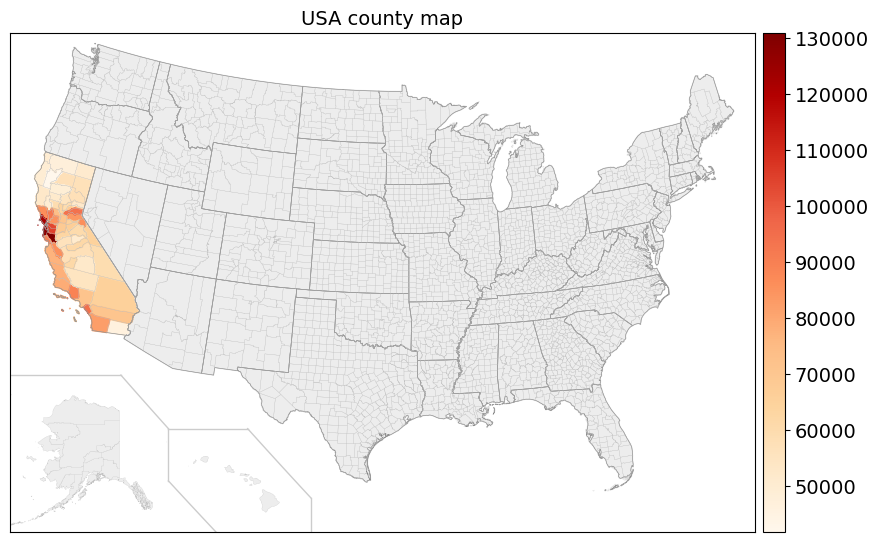

In [16]:
import plot_utils

plot_utils.choropleth_map_county(data[["FIPS_code", "B19013_001E"]])